# k-means

In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42)

df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"].astype(int)


0      3
1      2
2      1
3      0
4      2
      ..
495    3
496    0
497    2
498    2
499    1
Name: label, Length: 500, dtype: int32

<Axes: xlabel='x1', ylabel='x2'>

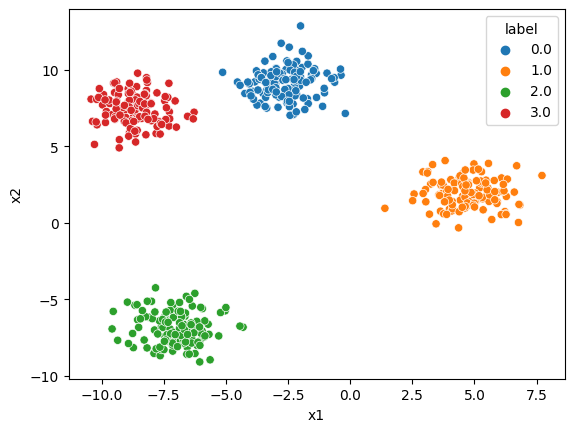

In [31]:
sns.scatterplot(data = df, x="x1", y="x2", hue="label", palette="tab10")

In [32]:
# remove label as we don't have it in unsupervised learning
X = df.drop("label", axis=1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature scaling

- no train test split
- use whole dataset for scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

Text(0.5, 1.0, 'Scaled X')

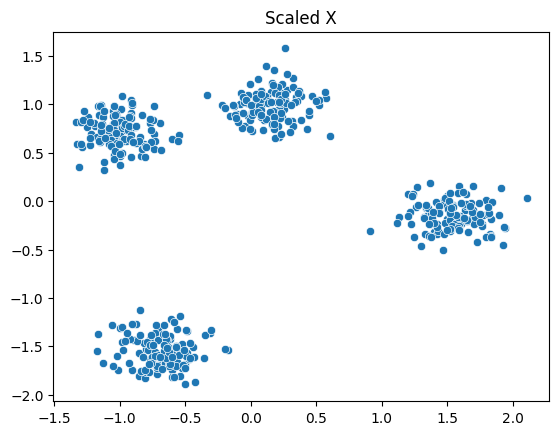

In [34]:
sns.scatterplot(x = scaled_X[:, 0], y = scaled_X[:,1])
plt.title("Scaled X")

## k-means

In [35]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distance = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_squared_distance


[999.9999999999994,
 601.2655029229379,
 116.09567852755524,
 28.78693897887401,
 26.198923692646304,
 22.919229462608037,
 20.2913115523908,
 19.06607593571747,
 17.965298550225995]

Text(0.5, 1.0, 'Elbow plot to find k')

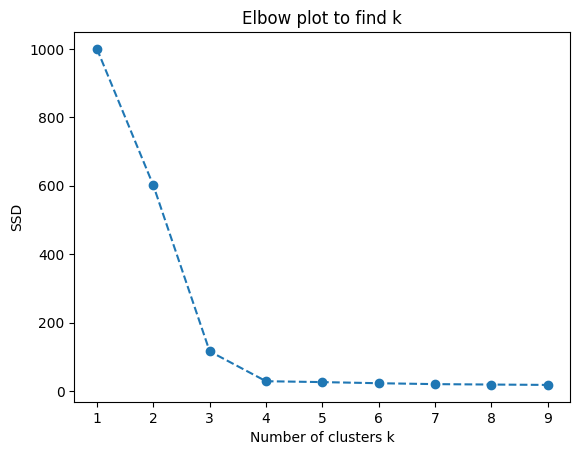

In [36]:
plt.plot(clusters, sum_squared_distance, "--o")
plt.xlabel("Number of clusters k")
plt.ylabel("SSD")
plt.title("Elbow plot to find k")

In [37]:
pd.Series(sum_squared_distance).diff()[1:]

# k = 3

1   -398.734497
2   -485.169824
3    -87.308740
4     -2.588015
5     -3.279694
6     -2.627918
7     -1.225236
8     -1.100777
dtype: float64

## Silhouette

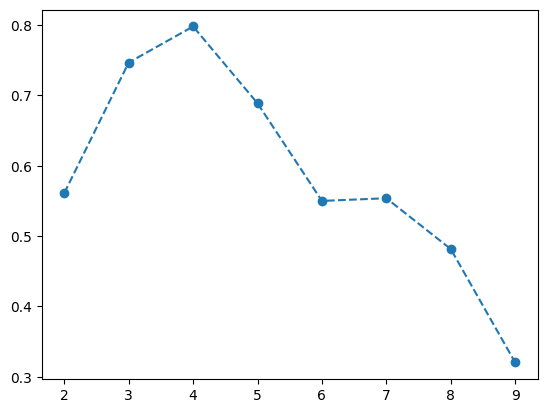

In [43]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

sil_score = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

plt.plot(clusters[1:], sil_score, "--o")

## Visualization

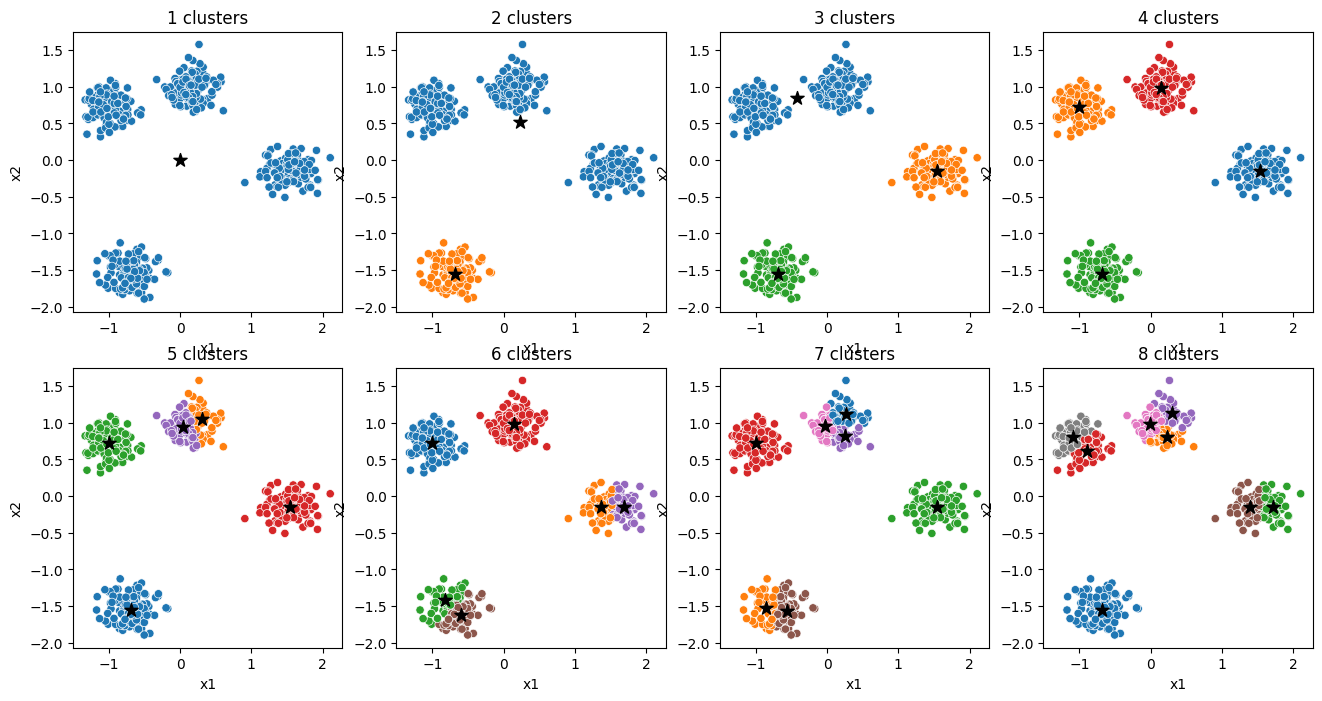

In [63]:

df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize = (16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_
    sns.scatterplot(data = df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s = 100, marker="*", color="black")

    ax.legend([],[],frameon = False)

    ax.set(title = f"{i+1} clusters")


In [55]:
kmeans[1].cluster_centers_

array([[ 0.22828759,  0.51618479],
       [-0.68486276, -1.54855438]])